ELECTRIC VEHICLES MARKET SIZE ANALYSIS

In [2]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns




df = pd.read_csv("D:\IIT INT\DATA\EV-data\Electric_Vehicle_Population_Data.csv")


<>:10: SyntaxWarning: invalid escape sequence '\I'
<>:10: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Akshat\AppData\Local\Temp\ipykernel_12172\1160407364.py:10: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("D:\IIT INT\DATA\EV-data\Electric_Vehicle_Population_Data.csv")


In [3]:
# Analysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
#Checking for null values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
df = df.dropna()# Dropping the null value

C:\Users\Akshat\AppData\Local\Temp\ipykernel_12172\745849222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis",legend=True)


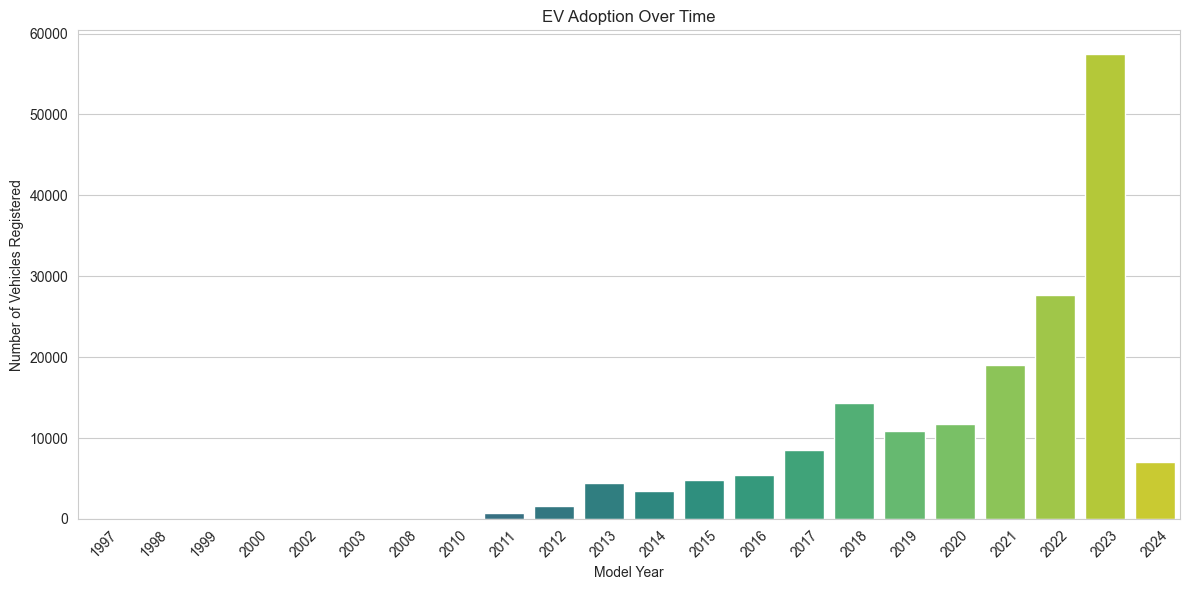

In [7]:
#1. Analysing the growth of EV population with respect to model year

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis",legend=False)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards despite the global pandemic in 2020. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption. The graph also indicates more demand for EV in the public which in part can be due to government encouraging people to buy more EVs to push towards their own goals of emission.

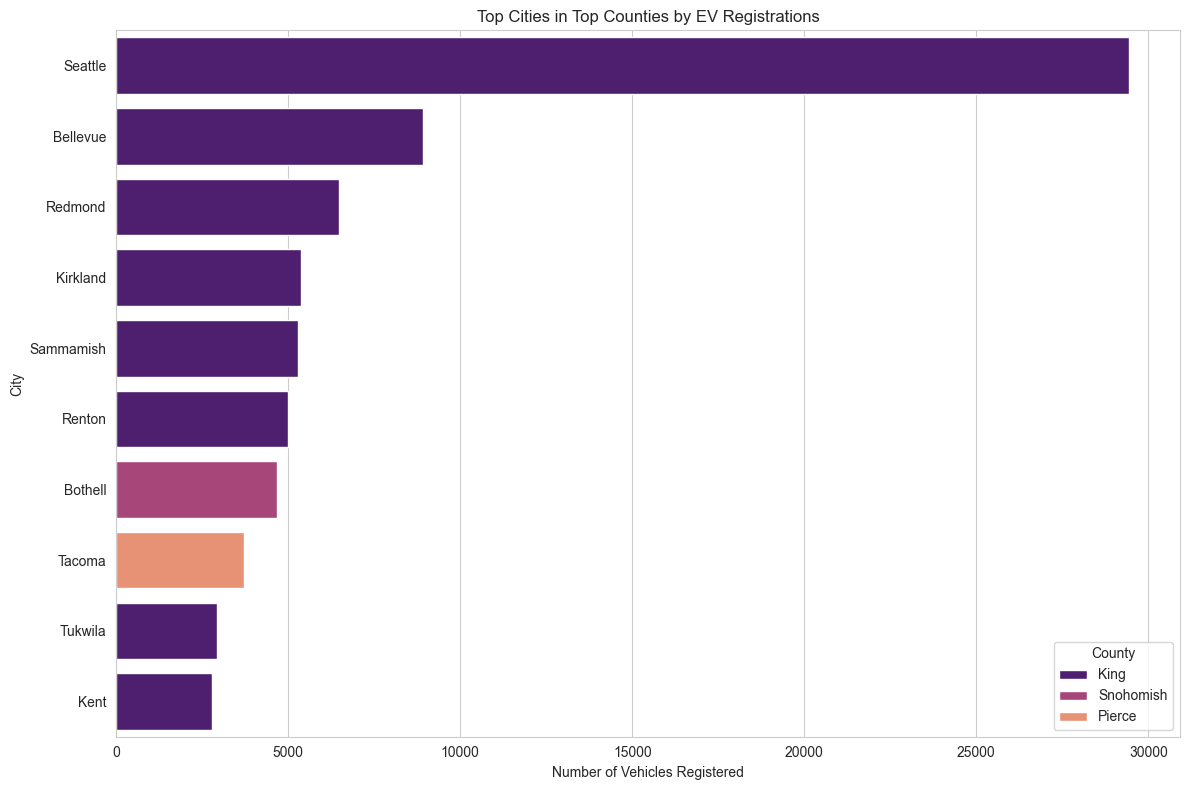

In [11]:
#Top Cities in Top Counties by EV Registeration


ev_county_distribution = df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

top_counties_data = df[df['County'].isin(top_counties)]

ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

C:\Users\Akshat\AppData\Local\Temp\ipykernel_12172\1697414664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="viridis")


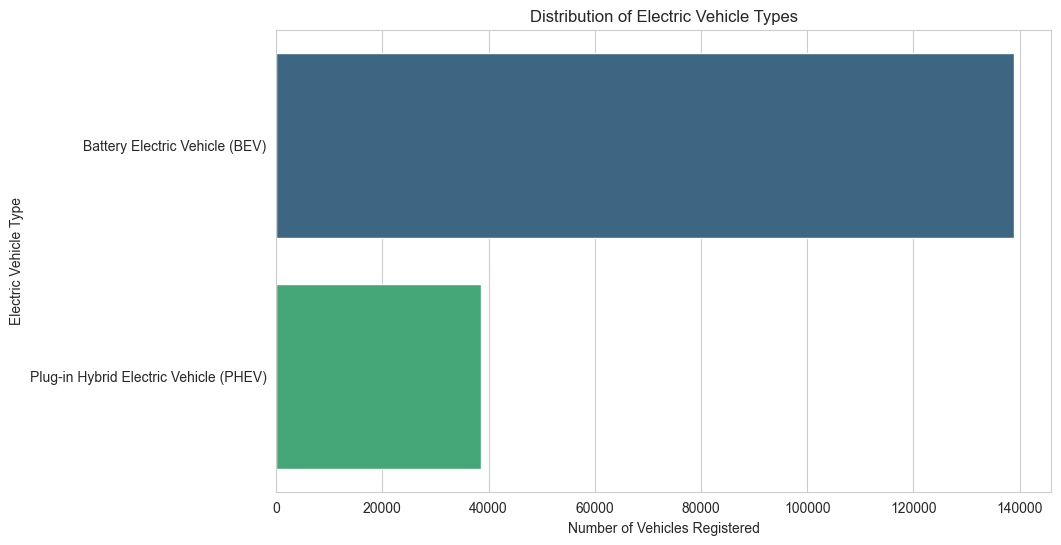

In [17]:
#Distribution of Electric Vechicle Types 


ev_type_distribution = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="viridis")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States

Analysing the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help in identifyig which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

C:\Users\Akshat\AppData\Local\Temp\ipykernel_12172\4099906677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="magma")


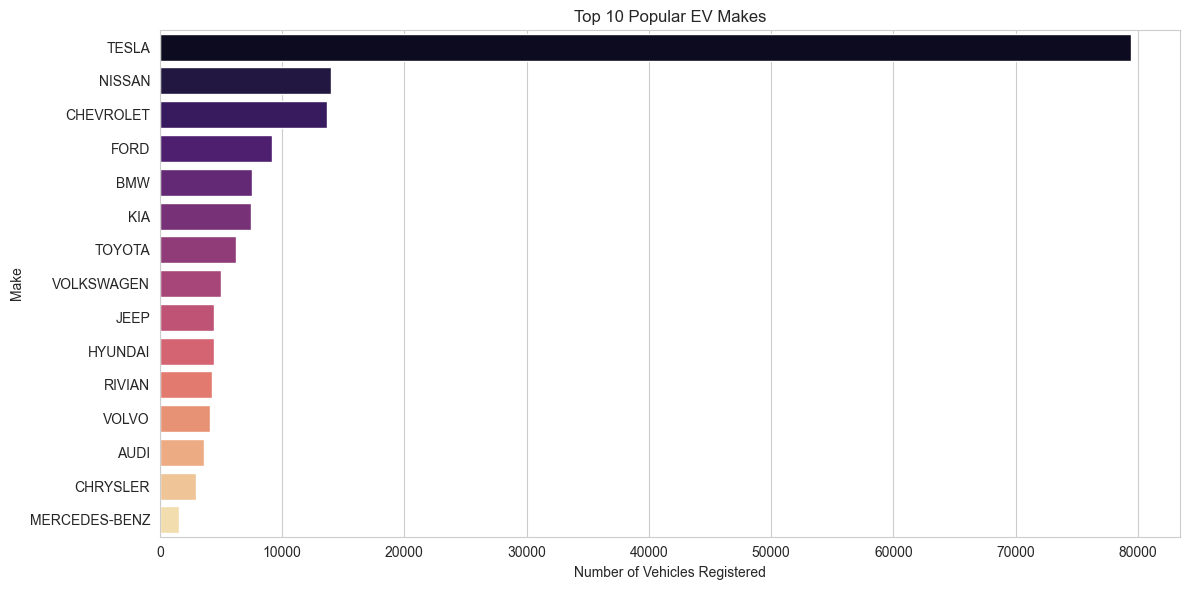

In [23]:
ev_make_distribution = df['Make'].value_counts().head(15)  # Limiting to top 15 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="magma")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

The graph shows us vital information such as:
1. TESLA leads by a substantial margin with the highest number of vehicles registered.
2. NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

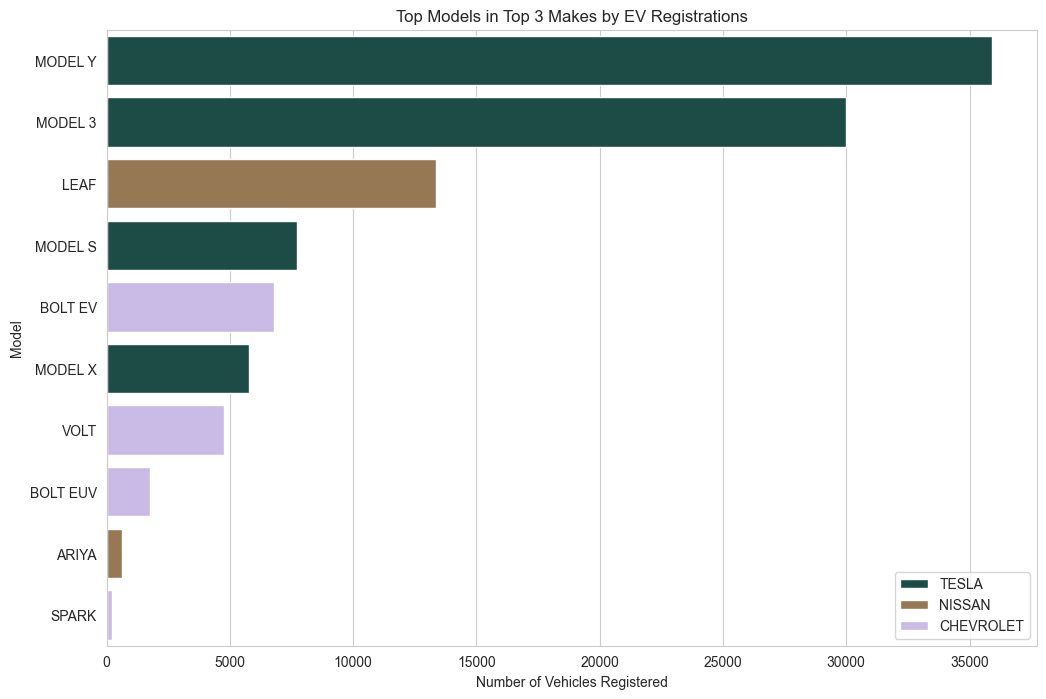

In [30]:
top_3_makes = ev_make_distribution.head(3).index


top_makes_data = df[df['Make'].isin(top_3_makes)]

ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="cubehelix")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend()

The following insights can be obtained from the graph:

1.TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.

2.NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.

3.TESLA’s MODEL S and MODEL X also have a significant number of registrations.

4.CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.

5.NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown

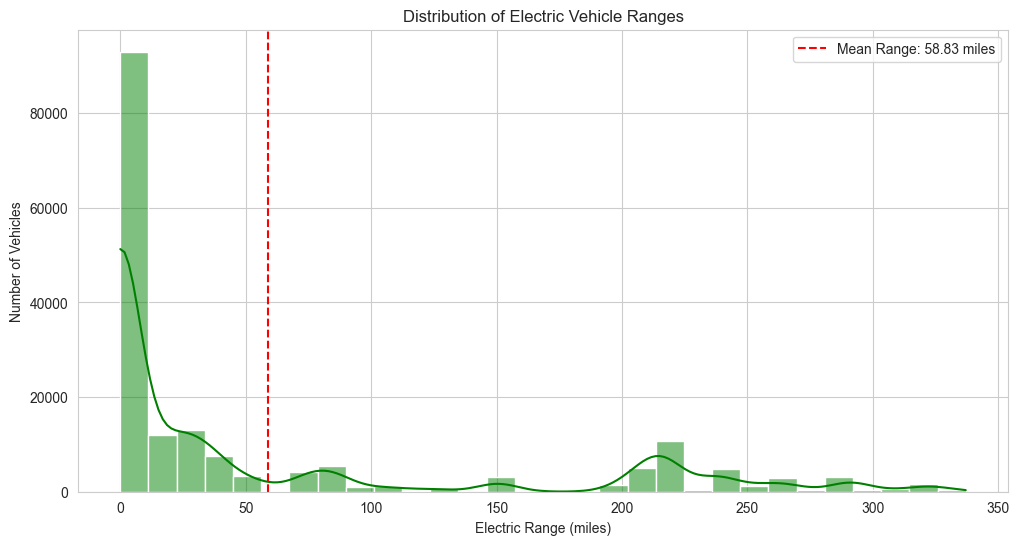

In [34]:
#Exploring Electrical Range 


plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='green')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()

The graph suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges

Next, Analysing the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):

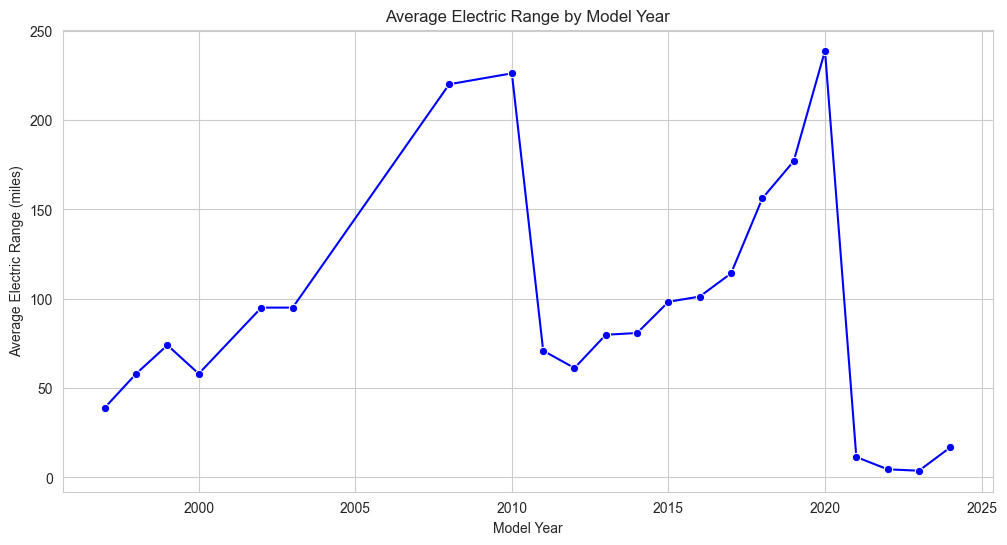

In [38]:
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='blue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.

C:\Users\Akshat\AppData\Local\Temp\ipykernel_12172\1277986165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=CAFV_type_distribution.index, palette="viridis")


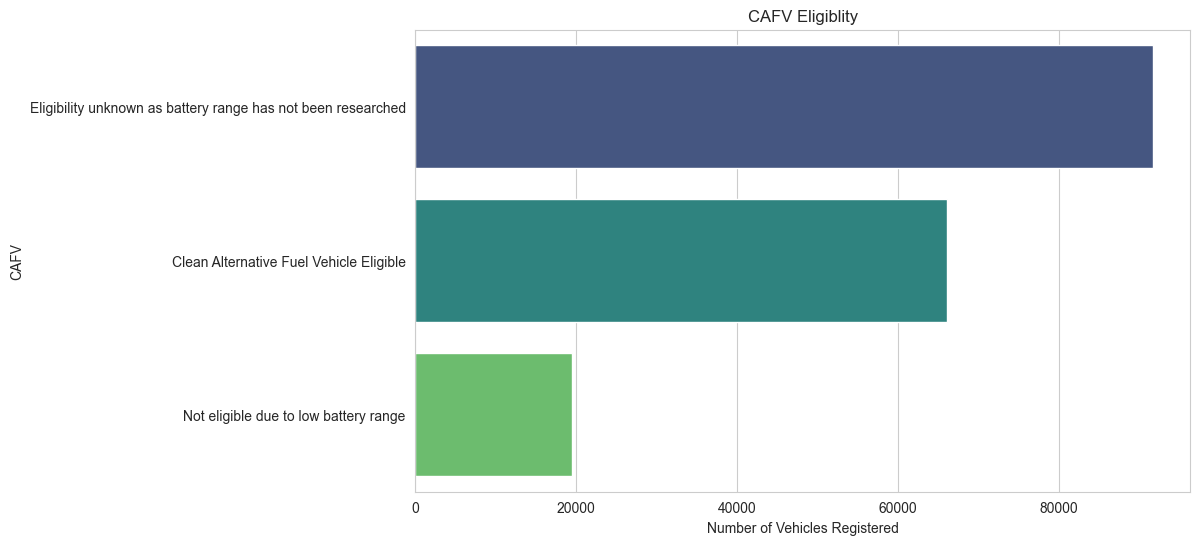

In [51]:
CAFV_type_distribution = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=CAFV_type_distribution.index, palette="viridis")
plt.title('CAFV Eligiblity')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('CAFV')
plt.tight_layout
plt.show()



Insights from the graph above:
1. High Number of Vehicles with Unknown Eligibility:

    The largest category in the bar chart is "Eligibility unknown as battery range has not been researched," indicating that many vehicles' eligibility for CAFV status has not been determined. This suggests a gap in data collection or reporting regarding battery range.
    Significant Number of CAFV-Eligible Vehicles:

2. The second largest group consists of "Clean Alternative Fuel Vehicle Eligible" vehicles:

    This indicates that a substantial portion of vehicles on the market meet the criteria for clean alternative fuel vehicles, reflecting a significant adoption of cleaner technologies among consumers who are aware of these benefits.

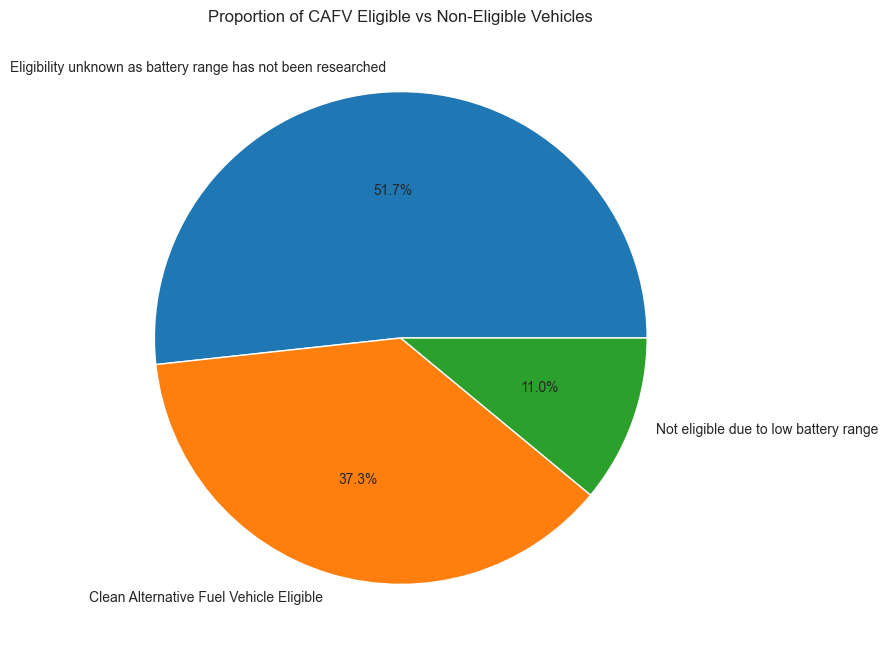

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(CAFV_type_distribution, labels=CAFV_type_distribution.index, autopct='%1.1f%%')
plt.title('Proportion of CAFV Eligible vs Non-Eligible Vehicles')
plt.show()